#  <font color='Blue'> Análise Exploratória dos Dados</font> 

# Conexão com os Dados


In [ ]:
# Conexão com os Dados
import pandas as pd
df = pd.read_excel('/content/clientes_investimentos.xlsx')
df

,cliente,poupanca,cdb,renda,segmentacao,seguro
0,537044639.0,312,1288,49002,40.0,1.0
1,876520833.0,340,5892,32696,13.0,1.0
2,881113910.0,520,2526,8855,40.0,1.0
3,891866209.0,832,7314,60821,40.0,1.0
4,810003285.0,1293,8593,23508,40.0,0.0
...,...,...,...,...,...,...
32556,816950489.0,1223,34,90663,38.0,0.0
32557,806707803.0,543,1940,12632,40.0,1.0
32558,730303105.0,324,3590,63919,40.0,0.0
32559,770056517.0,76,6566,36798,20.0,1.0


In [ ]:
# verificar dimensões do dataset
df.shape

(32561, 6)

In [ ]:
# Informações sobre as variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente      32561 non-null  float64
 1   poupanca     32561 non-null  int64  
 2   cdb          32561 non-null  int64  
 3   renda        32561 non-null  int64  
 4   segmentacao  32561 non-null  float64
 5   seguro       32561 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.5 MB


In [ ]:
# Verifica valores missing (ausentes , nulos)
df.isnull().sum()

cliente        0
poupanca       0
cdb            0
renda          0
segmentacao    0
seguro         0
dtype: int64

In [ ]:
# Verifica valores duplicados
df.duplicated().sum()

0

# Análise Estatística



In [ ]:
# Estatística Descritiva das variáveis numéricas do Dataset
df.describe()

,cliente,poupanca,cdb,renda,segmentacao,seguro
count,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,8.002490e+08,754.564755,5007.776788,52576.389331,40.437456,0.669205
std,5.757900e+07,433.078250,2884.511248,27424.158265,12.347429,0.470506
min,5.370446e+08,11.000000,1.000000,5007.000000,1.000000,0.000000
25%,7.506786e+08,378.000000,2518.000000,28821.000000,40.000000,0.000000
50%,8.003224e+08,755.000000,5028.000000,52561.000000,40.000000,1.000000
75%,8.503749e+08,1131.000000,7501.000000,76163.000000,45.000000,1.000000
max,8.999989e+08,1500.000000,10000.000000,99999.000000,99.000000,1.000000


In [ ]:
# Frequencia das variáveis categoricas (que possuem ao invés de uma sequencia de números, possuem categorias a, b, c...)
df['seguro'].value_counts()

1.0    21790
0.0    10771
Name: seguro, dtype: int64

In [ ]:
df['segmentacao'].value_counts()

In [ ]:
df.head(2)

,cliente,poupanca,cdb,renda,segmentacao,seguro
0,537044639.0,312,1288,49002,40.0,1.0
1,876520833.0,340,5892,32696,13.0,1.0


In [ ]:
# Criação de Campos 
df['invest_total'] = df['poupanca'] + df['cdb']
df

,cliente,poupanca,cdb,renda,segmentacao,seguro,invest_total
0,537044639.0,312,1288,49002,40.0,1.0,1600
1,876520833.0,340,5892,32696,13.0,1.0,6232
2,881113910.0,520,2526,8855,40.0,1.0,3046
3,891866209.0,832,7314,60821,40.0,1.0,8146
4,810003285.0,1293,8593,23508,40.0,0.0,9886
...,...,...,...,...,...,...,...
32556,816950489.0,1223,34,90663,38.0,0.0,1257
32557,806707803.0,543,1940,12632,40.0,1.0,2483
32558,730303105.0,324,3590,63919,40.0,0.0,3914
32559,770056517.0,76,6566,36798,20.0,1.0,6642


In [ ]:
df.corr(method='spearman')

,cliente,poupanca,cdb,renda,segmentacao,seguro,invest_total
cliente,1.000000,-0.007309,-0.007107,-0.006160,0.004825,0.003920,-0.008040
poupanca,-0.007309,1.000000,-0.003331,-0.001235,0.001161,-0.002554,0.140226
cdb,-0.007107,-0.003331,1.000000,-0.006298,-0.000746,0.007212,0.989391
renda,-0.006160,-0.001235,-0.006298,1.000000,-0.002455,0.007247,-0.006312
segmentacao,0.004825,0.001161,-0.000746,-0.002455,1.000000,0.264941,-0.000779
seguro,0.003920,-0.002554,0.007212,0.007247,0.264941,1.000000,0.006846
invest_total,-0.008040,0.140226,0.989391,-0.006312,-0.000779,0.006846,1.000000


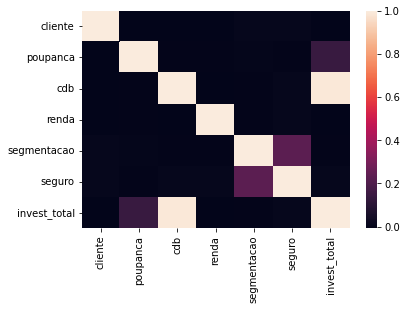

In [ ]:
import seaborn as sns
ax = sns.heatmap(df.corr(method='pearson'))

# Criação de Campos para Aprofundar a Análise 


In [ ]:
# Criação de Campos 
df['perc_cdb'] = df['cdb'] / df['invest_total']
df

,cliente,poupanca,cdb,renda,segmentacao,seguro,invest_total,perc_cdb
0,537044639.0,312,1288,49002,40.0,1.0,1600,0.805000
1,876520833.0,340,5892,32696,13.0,1.0,6232,0.945443
2,881113910.0,520,2526,8855,40.0,1.0,3046,0.829284
3,891866209.0,832,7314,60821,40.0,1.0,8146,0.897864
4,810003285.0,1293,8593,23508,40.0,0.0,9886,0.869209
...,...,...,...,...,...,...,...,...
32556,816950489.0,1223,34,90663,38.0,0.0,1257,0.027049
32557,806707803.0,543,1940,12632,40.0,1.0,2483,0.781313
32558,730303105.0,324,3590,63919,40.0,0.0,3914,0.917220
32559,770056517.0,76,6566,36798,20.0,1.0,6642,0.988558


# Realização de Filtros

In [ ]:
#filtrando registros do dataset com loc
df.loc[df.renda > 99990]

,cliente,poupanca,cdb,renda,segmentacao,seguro,invest_total,perc_cdb
4968,745335138.0,1427,7849,99998,50.0,1.0,9276,0.846162
8597,842006314.0,615,3800,99994,40.0,1.0,4415,0.860702
25922,874467515.0,1469,555,99999,40.0,1.0,2024,0.274209
30382,793615862.0,573,401,99995,52.0,1.0,974,0.411704


In [ ]:
#filtrando registros do dataset com loc
df.loc[df.perc_cdb > 0.98]

,cliente,poupanca,cdb,renda,segmentacao,seguro,invest_total,perc_cdb
6,744840078.0,104,9994,7679,16.0,0.0,10098,0.989701
41,804542270.0,24,5008,81378,40.0,1.0,5032,0.995231
66,890632045.0,17,1254,99552,40.0,0.0,1271,0.986625
85,882285895.0,77,8595,23252,35.0,0.0,8672,0.991121
90,786262548.0,15,1250,52603,40.0,1.0,1265,0.988142
...,...,...,...,...,...,...,...,...
32490,838184534.0,47,6930,8553,35.0,1.0,6977,0.993264
32521,730244116.0,46,6312,55710,40.0,1.0,6358,0.992765
32545,865829262.0,61,8697,81233,20.0,0.0,8758,0.993035
32549,872597289.0,61,6840,87053,40.0,0.0,6901,0.991161


In [ ]:
df.loc[(df.renda > 90000) & (df.perc_cdb > 0.98)]

,cliente,poupanca,cdb,renda,segmentacao,seguro,invest_total,perc_cdb
66,890632045.0,17,1254,99552,40.0,0.0,1271,0.986625
156,720818026.0,94,9239,97679,40.0,1.0,9333,0.989928
487,797520963.0,28,7038,91149,45.0,1.0,7066,0.996037
707,882666684.0,77,5581,94303,40.0,1.0,5658,0.986391
775,832366118.0,84,6318,99896,56.0,1.0,6402,0.986879
...,...,...,...,...,...,...,...,...
31455,768333258.0,37,9967,96154,20.0,1.0,10004,0.996301
31654,846093646.0,78,6247,98813,50.0,1.0,6325,0.987668
31935,810034906.0,63,4857,91586,40.0,0.0,4920,0.987195
32326,795989856.0,102,6801,99742,45.0,1.0,6903,0.985224


In [ ]:
#iloc: selecionando pela faixa de ´indice de 2 até 10 (10 é exclusivo)
df.iloc[25:50]

# Análise Gráfica
![](https://raw.githubusercontent.com/infinum/flutter-charts/feature/render-object/assets/showcase.gif)

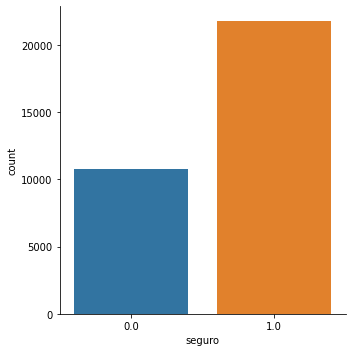

In [ ]:
# importar o Sns
import seaborn as sns
# Visualização Gráfica dos dados
sns.catplot(x="seguro", kind="count",  data=df);

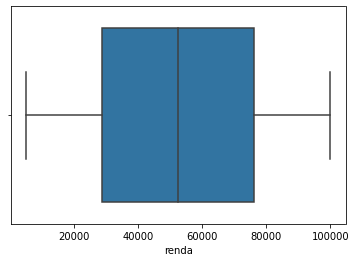

In [ ]:
# Visualização Gráfica dos dados
sns.boxplot(x="renda",   data=df);

In [ ]:
# Visualização Gráfica dos dados
sns.distplot(df.perc_cdb	, kde=True)

## Mão na Massa

In [ ]:
import pandas as pd
df2 = pd.read_csv("/content/BANK_CUSTOMERS_SAS.csv", delimiter=';')
df2

In [ ]:
df2.info()

In [ ]:
df2.describe()

# **FIM**